# Basic Numerical Methods


## 1. Least Squares Method and Regression Analysis



### a. Least Squares Method

The least squares method minimizes the sum of squared differences between observed and predicted values. It's used to find the best-fitting line in regression analysis.

Mathematically:
$$
	{Error} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where:
$$
(y_i) = actual value
$$
$$
(\hat{y}_i) = predicted value$$
$$
    


### b. Simple Linear Regression Example

Goal of Linear Regression:

We want to find the best-fitting line: \( y = mx + b \)

Design Matrix A:
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]
Slope (m): 0.7500000000000004
Intercept (b): 1.3899999999999983
Residuals: [0.027]
Rank of matrix A: 2
Singular values of A: [7.69121313 0.91936964]


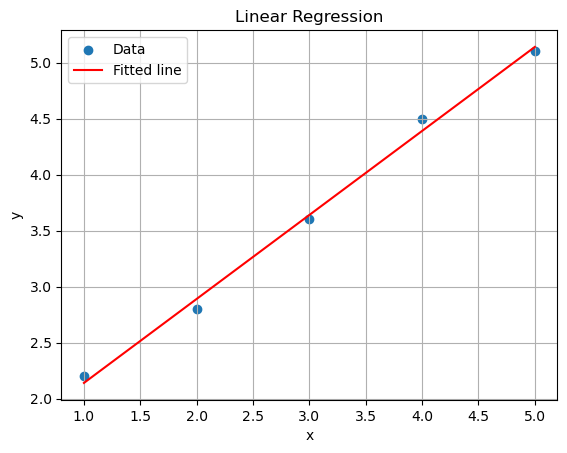

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Design matrix construction based on data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.2,2.8,3.6,4.5,5.1])

# Step 2: Build matrix A: Each row represents the linear model y=mx+c.
A = np.vstack([x, np.ones(len(x))]).T # Stack x and a column of ones and then transpose it
print ("Design Matrix A:\n", A) # The first column is the value of x. The second column is always 1, which allows us to solve for the intercept c.

# Step 3: Fit line using least squares- it solves for the slope m and intercept c of the best-fit line
# np.linalg.lstsq returns a tuple (coeffs, residuals, rank, s), so unpack accordingly.
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m = coeffs[0]
b = coeffs[1]

# Step 4: Output the results and plot them
print("Slope (m):", m)
print("Intercept (b):", b)
print("Residuals:", residuals)
print("Rank of matrix A:", rank)
print("Singular values of A:", s) 

plt.scatter(x, y, label='Data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


#### Exercise- Make up a set of data and find their best fit using least squares linear regression.

Slope (m): 0.9771428571428572
Intercept (b): 1.0238095238095242
Residuals: [0.06419048]
Rank of matrix A: 2
Singular values of A: [7.69591871 1.33147856]


Text(0.5, 1.0, 'Least Squares Linear Regression')

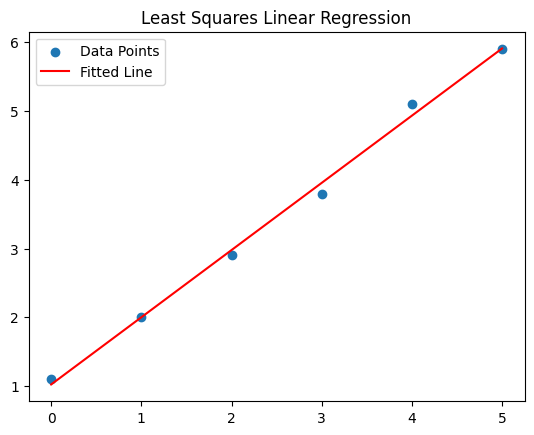

In [3]:
# #### Exercise- Make up a set of data and find their best fit using least squares linear regression.
#!/usr/bin/env python3
import numpy as np 
import matplotlib.pyplot as plt
# My own data points
x_data = np.array([0, 1, 2, 3, 4, 5])
y_data = np.array([1.1, 2.0, 2.9, 3.8, 5.1, 5.9])
# Construct design matrix
A = np.vstack([x_data, np.ones(len(x_data))]).T
# Perform least squares fitting
coeffs, residuals, rank, s = np.linalg.lstsq(A, y_data, rcond=None)
m = coeffs[0]
b = coeffs[1]
# Output results
print("Slope (m):", m)
print("Intercept (b):", b)
print("Residuals:", residuals)
print("Rank of matrix A:", rank)
print("Singular values of A:", s)
# Plot the data and the fitted line
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_data, m*x_data + b, 'r', label='Fitted Line')
plt.legend()
plt.title('Least Squares Linear Regression')


## 2. Root Finding Methods in Numerical Analysis

This notebook demonstrates two popular numerical methods for finding roots of equations:

1. **Bisection Method**
2. **Newton-Raphson Method**

We will use the function:
\[ f(x) = x^3 - 2x - 5 \]



### a. Bisection Method

The Bisection Method is a simple and robust technique for finding roots of a continuous function. It works by repeatedly halving an interval and selecting the subinterval in which the function changes sign.

#### Algorithm Steps:
1. Define the function f(x)
2. Choose interval [a, b] where f(a) * f(b) < 0
3. Repeat until convergence:
   - Compute midpoint c = (a + b)/2
   - Evaluate f(c)
   - If f(c) * f(a) < 0, set b = c
   - Else, set a = c
   - Stop when |f(c)| is small enough


Approximate root: 2.0945514738559723
f(c): -8.579076471448843e-08


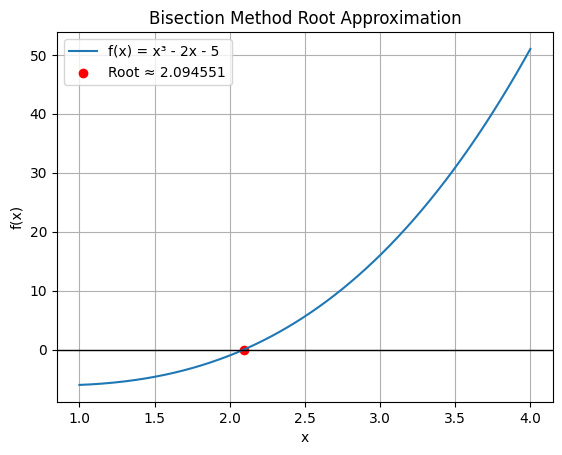

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the function
def f(x):
    return x**3 - 2*x - 5

# 2. Choose interval [a, b] where f(a)*f(b) < 0
a = 2
b = 3

# Set tolerance level for convergence
tolerance = 1e-7

# Compute midpoint
c = (a + b) / 2

# 3. Repeat until convergence
while abs(f(c)) > tolerance:
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
    c = (a + b) / 2  # update midpoint

# Print final result
print("Approximate root:", c)
print("f(c):", f(c))

# Plot the function and the root
x_vals = np.linspace(1, 4, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x³ - 2x - 5')
plt.axhline(0, color='black', linewidth=1)
plt.scatter(c, f(c), color='red', label=f'Root ≈ {c:.6f}')
plt.title("Bisection Method Root Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()




### b. Newton-Raphson Method

The Newton-Raphson Method is an efficient technique for finding roots using the function's derivative.

#### Algorithm Steps:
1. Define the function and its deriative

2. Start with an initial guess \( x_0 \).

3. Repeat 
   Compute the next approximation using:

   $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

   Until:

   $$ |x_{n+1} - x_n| < \varepsilon $$

4. Return the final approximation $$ x_{n+1} $$ as the root.



In [ ]:
# Complete the Newton-Raphson Method implementation
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2
# Initial guess
x0 = 2.5
tolerance = 0.0000001
max_iterations = 100
x_n = x0
for i in range(max_iterations):
    f_xn = f(x_n)
    df_xn = df(x_n)
    if df_xn == 0:
        print("Derivative is zero. No solution found.")
        break
    x_n1 = x_n - f_xn / df_xn
    if abs(f(x_n1)) < tolerance:
        break
    x_n = x_n1
print("Approximate root using Newton-Raphson Method:", x_n1)

Approximate root using Newton-Raphson Method: 2.094551481550247


### Root finding exercise: Beam Deflection

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$

#### 🎯 Task:
Use a root-finding method (e.g., Newton-Raphson or Bisection) to find the position \( x \) along the beam where the **maximum deflection** occurs.

#### 💡 Hint:
To find the maximum deflection:
1. Compute the derivative y'(x) 
2. Solve y'(x) = 0  within the interval x in [0, L] 

#### 📌 Constants:
- L = 10 
- w = 5 
- E and I are constants (you may assume EI = 1 for simplicity)

In [11]:
# Beam deflection: find x of maximum deflection via Bisection on y'(x)=0
import math

# constants
L = 10.0
w = 5.0
EI = 1.0           # as allowed

def y(x):
    return (w/(24*EI)) * x * (L**3 - 2*L*x**2 + x**3)

def g(x):          # derivative factor, proportional to y'(x)
    return L**3 - 6*L*x**2 + 4*x**3

# bisection on [0, L]
a, b = 0.0, L
tol = 1e-10
fa, fb = g(a), g(b)
assert fa*fb < 0, "g(a) and g(b) must have opposite signs"

c = (a+b)/2
while abs(g(c)) > tol:
    if g(a)*g(c) < 0:
        b = c
    else:
        a = c
    c = (a+b)/2

x_max = c
y_max = y(x_max)
print("x for maximum deflection:", x_max)
print("Maximum deflection y(x):", y_max)


x for maximum deflection: 5.0
Maximum deflection y(x): 651.0416666666667
